In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")

print(f"test__images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

train_images: (60000, 28, 28)
train_labels: (60000,)
test__images: (10000, 28, 28)
test_labels: (10000,)


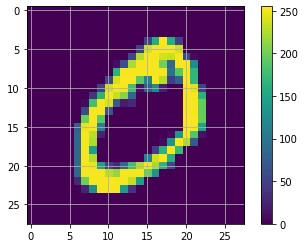

0


In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()
print(train_labels[1])

In [5]:
list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [6]:
print(train_images[0].shape)
print(train_images[0].reshape(-1).shape)
non_zero = list(filter(lambda x: x != 0, train_images[0].reshape(-1)))
print(len(non_zero))
print(non_zero)
print(sorted(non_zero))

(28, 28)
(784,)
166
[3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 80, 156, 107, 253, 253, 205, 11, 43, 154, 14, 1, 154, 253, 90, 139, 253, 190, 2, 11, 190, 253, 70, 35, 241, 225, 160, 108, 1, 81, 240, 253, 253, 119, 25, 45, 186, 253, 253, 150, 27, 16, 93, 252, 253, 187, 249, 253, 249, 64, 46, 130, 183, 253, 253, 207, 2, 39, 148, 229, 253, 253, 253, 250, 182, 24, 114, 221, 253, 253, 253, 253, 201, 78, 23, 66, 213, 253, 253, 253, 253, 198, 81, 2, 18, 171, 219, 253, 253, 253, 253, 195, 80, 9, 55, 172, 226, 253, 253, 253, 253, 244, 133, 11, 136, 253, 253, 253, 212, 135, 132, 16]
[1, 1, 2, 2, 2, 3, 9, 11, 11, 11, 14, 16, 16, 18, 18, 18, 18, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 39, 43, 45, 46, 49, 55, 56, 64, 64, 66, 70, 78, 80, 80, 81, 81, 82, 82, 90, 93, 93, 94, 107, 108, 114, 

In [7]:
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

uint8
uint8
uint8
uint8


In [9]:
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)) )
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)) )

255 0
255 0


In [10]:
print(train_images.max(), train_images.min())
print(test_images.max(), test_images.min())

255 0
255 0


In [11]:
test_images = test_images.astype(np.float64)
train_images = train_images.astype(np.float64)

In [12]:
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

float64
uint8
float64
uint8


In [13]:
train_images = train_images / 255
test_images = test_images / 255

In [14]:
print(train_images.max(), train_images.min())
print(test_images.max(), test_images.min())

1.0 0.0
1.0 0.0


In [15]:
train_images[:5].shape

(5, 28, 28)

In [16]:
np.hstack(train_images[:5]).shape

(28, 140)

In [17]:
train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

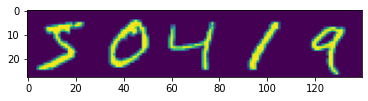

In [18]:
plt.imshow(train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1))
plt.show()

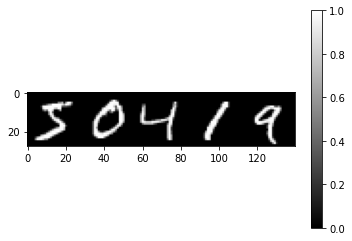

[5 0 4 1 9]


In [19]:
plt.imshow(train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()
print(train_labels[:5])

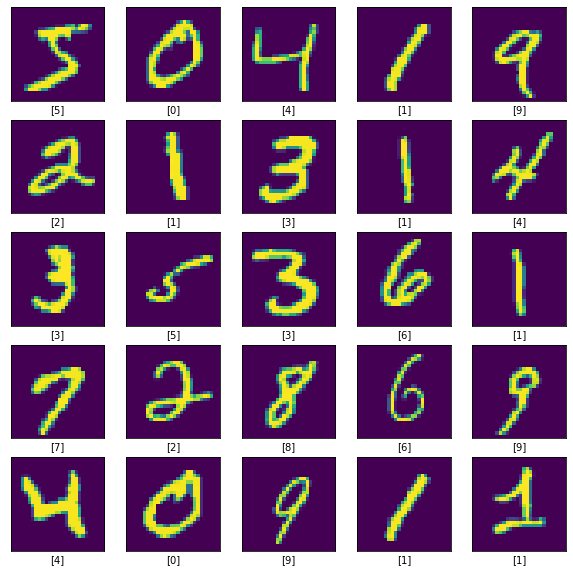

In [21]:
plt.figure(figsize=(10,10)) # 최초 창의 크기를 가로 세로 10인치로 설정
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [22]:
for i in range(3):
  print(np.random.random())

0.08079574105694343
0.9814135371032088
0.5895272749101961


In [23]:
np.random.random((28,28)).shape

(28, 28)

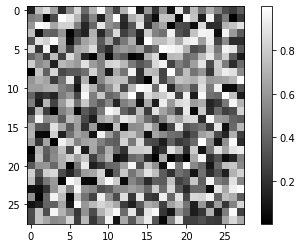

In [24]:
plt.imshow(np.random.random((28,28)), cmap="gray")
plt.colorbar()
plt.show()

In [25]:
for i in range(3):
  rand = np.random.normal(0., 0.1, 1)
  print(rand)

[-0.00535531]
[-0.11042992]
[0.01824429]


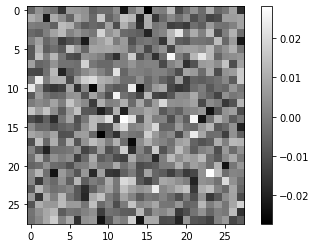

In [26]:
plt.imshow(np.random.normal(0.0, 0.01, (28, 28)), cmap="gray")
plt.colorbar()
plt.show()

In [27]:
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28, 28))

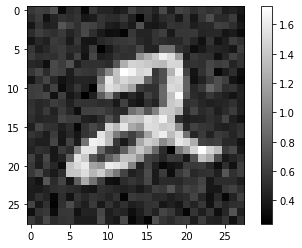

In [28]:
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

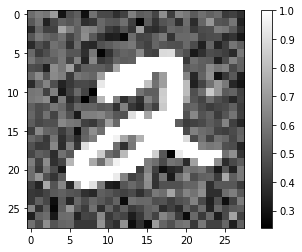

In [29]:
noisy_image[noisy_image > 1.0] = 1.0
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

In [30]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

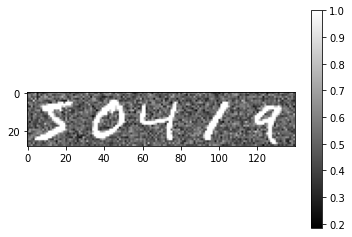

In [31]:
plt.imshow(train_noisy_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()

In [32]:
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)


In [34]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical( train_labels, 10)
test_labels = to_categorical( test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000, 10) (10000, 10)


In [36]:
# input (28, 28), 64 unit의 simple RNN, 10 unit의 fully-conntect를 가진 모델
from keras.layers import SimpleRNN, Dense, Input
from keras.models import Model

inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [39]:
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 39s - loss: 0.7499 - accuracy: 0.7570 - val_loss: 0.4387 - val_accuracy: 0.8638 - 39s/epoch - 21ms/step
Epoch 2/5
1875/1875 - 35s - loss: 0.4017 - accuracy: 0.8770 - val_loss: 0.3567 - val_accuracy: 0.8897 - 35s/epoch - 19ms/step
Epoch 3/5
1875/1875 - 36s - loss: 0.3243 - accuracy: 0.9036 - val_loss: 0.2724 - val_accuracy: 0.9202 - 36s/epoch - 19ms/step
Epoch 4/5
1875/1875 - 36s - loss: 0.2870 - accuracy: 0.9163 - val_loss: 0.2375 - val_accuracy: 0.9294 - 36s/epoch - 19ms/step
Epoch 5/5
1875/1875 - 35s - loss: 0.2635 - accuracy: 0.9229 - val_loss: 0.2405 - val_accuracy: 0.9295 - 35s/epoch - 18ms/step


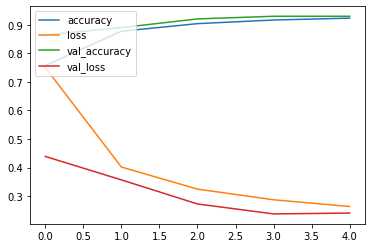

In [40]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [45]:
res = model.predict( test_noisy_images[3:4] ) 
res.shape

(1, 10)

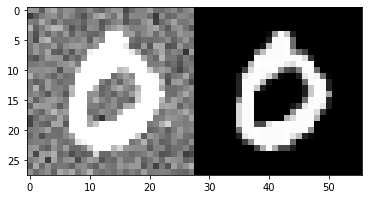

In [46]:
plt.imshow(   np.concatenate([test_noisy_images[3], test_images[3]], axis=1) , cmap="gray")
plt.show()

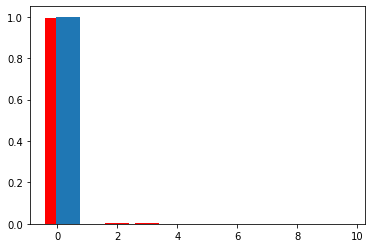

In [47]:
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[3])
plt.show()

In [48]:
model.save("models/RNN_based_MNIST_001.h5")

In [49]:
new_model = tf.keras.models.load_model('models/RNN_based_MNIST_001.h5')

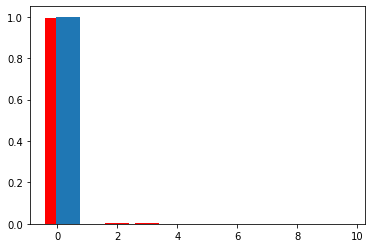

In [50]:
res = new_model.predict( test_noisy_images[3:4] ) 
res.shape
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[3])
plt.show()

In [51]:
loss, acc = new_model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)

313/313 - 2s - loss: 0.2405 - accuracy: 0.9295 - 2s/epoch - 8ms/step
0.24047201871871948 0.9294999837875366
